# importing all necessary libraries

In [144]:
!pip install matplotlib
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import tree, metrics
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading the data, that is the players_21.csv file containing the features for predicting player ratings

In [145]:
players_ratings21=pd.read_csv('/content/drive/My Drive/Colab Notebooks/FIFA_Player_Ratings/players_21.csv')

In [146]:
players_ratings21.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,103500000.0,560000.0,33,...,52+3,52+3,52+3,62+3,19+3,https://cdn.sofifa.net/players/158/023/21_120.png,https://cdn.sofifa.net/teams/241/60.png,https://cdn.sofifa.net/flags/es.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",92,92,63000000.0,220000.0,35,...,54+3,54+3,54+3,61+3,20+3,https://cdn.sofifa.net/players/020/801/21_120.png,https://cdn.sofifa.net/teams/45/60.png,https://cdn.sofifa.net/flags/it.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
2,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,91,91,111000000.0,240000.0,31,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/21_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,NaN,https://cdn.sofifa.net/flags/pl.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,132000000.0,270000.0,28,...,49+3,49+3,49+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/21_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CAM, CM",91,91,129000000.0,370000.0,29,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/21_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [147]:
players_ratings21.shape

(18944, 110)

# Data Pre-processing

In [148]:
#Dropping all irrelevant columns before cleaning the data

players_ratings21 = players_ratings21.drop(
    ['long_name', 'player_url','club_jersey_number','nation_jersey_number',
     'player_face_url', 'club_logo_url', 'club_flag_url', 'nation_logo_url', 'nation_flag_url','short_name','ldm','cdm','rdm','rwb','lb','lcb','cb','rcb','rb','gk',
     'rw','lam','cam','ram','lm','lcm','cm','rcm','rm','lwb','ls','st','rs','lw','lf','cf','rf'],
    axis=1
)
players_ratings21.head()

,sofifa_id,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,158023,"RW, ST, CF",93,93,103500000.0,560000.0,33,1987-06-24,170,72,...,96,32,35,24,6,11,15,14,8,NaN
1,20801,"ST, LW",92,92,63000000.0,220000.0,35,1985-02-05,187,83,...,95,28,32,24,7,11,15,14,11,NaN
2,188545,ST,91,91,111000000.0,240000.0,31,1988-08-21,184,80,...,88,35,42,19,15,6,12,8,10,NaN
3,190871,"LW, CAM",91,91,132000000.0,270000.0,28,1992-02-05,175,68,...,93,35,30,29,9,9,15,15,11,NaN
4,192985,"CAM, CM",91,91,129000000.0,370000.0,29,1991-06-28,181,70,...,91,68,65,53,15,13,5,10,13,NaN


In [149]:
#Displaying the number of entities in each column, finding the mean, std, min and the max values as well as displaying the lower and upper quartiles
players_ratings21.describe()

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,18944.000000,18944.000000,18944.000000,1.870700e+04,18719.000000,18944.000000,18944.000000,18944.000000,18719.000000,18719.000000,...,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,18944.000000,2083.000000
mean,226232.328917,65.677787,71.086729,2.902288e+06,9148.482825,25.225823,181.190773,75.016892,47908.905551,1.355468,...,57.978674,46.470017,47.581767,45.546505,16.446052,16.236486,16.103357,16.225982,16.551309,37.203553
std,27166.574284,7.002278,6.109985,7.743775e+06,19893.149956,4.697354,6.825672,7.057140,53906.733776,0.739015,...,12.118390,20.169591,21.402461,20.953997,17.577332,16.845480,16.519399,17.017341,17.878121,10.714523
min,41.000000,47.000000,47.000000,9.000000e+03,500.000000,16.000000,155.000000,50.000000,1.000000,1.000000,...,12.000000,3.000000,5.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000
25%,210028.750000,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,176.000000,70.000000,461.000000,1.000000,...,50.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000,28.000000
50%,232301.500000,66.000000,71.000000,9.750000e+05,3000.000000,25.000000,181.000000,75.000000,1913.000000,1.000000,...,59.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000,37.000000
75%,246745.750000,70.000000,75.000000,2.000000e+06,8000.000000,29.000000,186.000000,80.000000,110986.000000,1.000000,...,66.000000,63.000000,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000,45.000000
max,258970.000000,93.000000,95.000000,1.855000e+08,560000.000000,53.000000,206.000000,110.000000,114899.000000,4.000000,...,96.000000,94.000000,93.000000,90.000000,90.000000,92.000000,93.000000,91.000000,90.000000,65.000000


In [150]:
#player stat features
columns = ['sofifa_id', 'overall','movement_reactions','passing','mentality_composure','dribbling',
'potential','release_clause_eur','wage_eur','value_eur',
'power_shot_power','physic','mentality_vision','attacking_short_passing','shooting','goalkeeping_speed',
'skill_long_passing','age','skill_ball_control','international_reputation','league_level', 'nation_team_id','sofifa_id','overall',
            'attacking_crossing','dob','club_joined',
           'attacking_finishing', 'club_name','club_position',
           'attacking_heading_accuracy', 'league_name','club_loaned_from',
           'attacking_short_passing', 'attacking_volleys','club_contract_valid_until',
           'skill_dribbling', 'skill_curve', 'skill_fk_accuracy','league_level', 'nation_team_id',
           'skill_long_passing', 'skill_ball_control', 'movement_acceleration',
           'movement_sprint_speed', 'movement_agility', 'movement_reactions',
           'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina',
           'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
           'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure'
           , 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving',
           'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes','player_positions']
X = players_ratings21[columns]
X.head()

,sofifa_id,overall,movement_reactions,passing,mentality_composure,dribbling,potential,release_clause_eur,wage_eur,value_eur,...,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,player_positions
0,158023,93,94,91.0,96,95.0,93,138400000.0,560000.0,103500000.0,...,75,96,35,24,6,11,15,14,8,"RW, ST, CF"
1,20801,92,95,81.0,95,89.0,92,75900000.0,220000.0,63000000.0,...,84,95,32,24,7,11,15,14,11,"ST, LW"
2,188545,91,93,78.0,88,85.0,91,132000000.0,240000.0,111000000.0,...,88,88,42,19,15,6,12,8,10,ST
3,190871,91,91,86.0,93,94.0,91,166500000.0,270000.0,132000000.0,...,92,93,30,29,9,9,15,15,11,"LW, CAM"
4,192985,91,91,93.0,91,88.0,91,161000000.0,370000.0,129000000.0,...,84,91,65,53,15,13,5,10,13,"CAM, CM"


In [151]:
#Checking if there are missing values before imputation
players_ratings21.isna().any()

sofifa_id                  False
player_positions           False
overall                    False
potential                  False
value_eur                   True
                           ...  
goalkeeping_handling       False
goalkeeping_kicking        False
goalkeeping_positioning    False
goalkeeping_reflexes       False
goalkeeping_speed           True
Length: 73, dtype: bool

In [152]:
# Using the Simple Imputer to fill all missing values before encoding
imputer = SimpleImputer(strategy='most_frequent')

imputed_data = imputer.fit_transform(X)

imputed_df = pd.DataFrame(imputed_data, columns=X.columns)
imputed_df

,sofifa_id,overall,movement_reactions,passing,mentality_composure,dribbling,potential,release_clause_eur,wage_eur,value_eur,...,mentality_penalties,mentality_composure,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,player_positions
0,158023,93,94,91.0,96,95.0,93,138400000.0,560000.0,103500000.0,...,75,96,35,24,6,11,15,14,8,"RW, ST, CF"
1,20801,92,95,81.0,95,89.0,92,75900000.0,220000.0,63000000.0,...,84,95,32,24,7,11,15,14,11,"ST, LW"
2,188545,91,93,78.0,88,85.0,91,132000000.0,240000.0,111000000.0,...,88,88,42,19,15,6,12,8,10,ST
3,190871,91,91,86.0,93,94.0,91,166500000.0,270000.0,132000000.0,...,92,93,30,29,9,9,15,15,11,"LW, CAM"
4,192985,91,91,93.0,91,88.0,91,161000000.0,370000.0,129000000.0,...,84,91,65,53,15,13,5,10,13,"CAM, CM"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,257710,47,48,26.0,40,27.0,52,57000.0,1000.0,70000.0,...,35,40,56,47,12,13,8,14,6,CB
18940,257933,47,50,49.0,35,47.0,53,72000.0,1000.0,70000.0,...,35,35,42,53,8,8,13,14,10,CM
18941,257936,47,44,49.0,35,46.0,47,47000.0,2000.0,45000.0,...,36,35,43,45,8,5,11,5,7,CM
18942,258736,47,53,40.0,45,53.0,67,165000.0,500.0,130000.0,...,50,45,11,13,11,13,9,9,6,ST


In [153]:
#Checking if there are still missing values, ie checking if the imputation was successful before encoding
imputed_df.isna().any()

sofifa_id                  False
overall                    False
movement_reactions         False
passing                    False
mentality_composure        False
                           ...  
goalkeeping_handling       False
goalkeeping_kicking        False
goalkeeping_positioning    False
goalkeeping_reflexes       False
player_positions           False
Length: 67, dtype: bool

In [154]:
#One-hot encoding using the get_dummies method
X = pd.get_dummies(imputed_df, columns=['overall',
            'attacking_crossing','dob','club_joined',
           'attacking_finishing', 'club_name','club_position',
           'attacking_heading_accuracy', 'league_name','club_loaned_from',
           'attacking_short_passing', 'attacking_volleys','club_contract_valid_until',
           'skill_dribbling', 'skill_curve', 'skill_fk_accuracy',
           'skill_long_passing', 'skill_ball_control', 'movement_acceleration',
           'movement_sprint_speed', 'movement_agility', 'movement_reactions',
           'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina',
           'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
           'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure'
           , 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving',
           'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes','player_positions'])

In [155]:
#Displaying the encoded dataset
X.head()

,sofifa_id,passing,dribbling,potential,release_clause_eur,wage_eur,value_eur,physic,shooting,goalkeeping_speed,...,"player_positions_ST, RM, LW","player_positions_ST, RM, RW","player_positions_ST, RM, RWB","player_positions_ST, RW","player_positions_ST, RW, CAM","player_positions_ST, RW, CF","player_positions_ST, RW, LM","player_positions_ST, RW, LW","player_positions_ST, RW, RM","player_positions_ST, RWB"
0,158023,91.0,95.0,93,138400000.0,560000.0,103500000.0,65.0,92.0,45.0,...,0,0,0,0,0,0,0,0,0,0
1,20801,81.0,89.0,92,75900000.0,220000.0,63000000.0,77.0,93.0,45.0,...,0,0,0,0,0,0,0,0,0,0
2,188545,78.0,85.0,91,132000000.0,240000.0,111000000.0,82.0,91.0,45.0,...,0,0,0,0,0,0,0,0,0,0
3,190871,86.0,94.0,91,166500000.0,270000.0,132000000.0,59.0,85.0,45.0,...,0,0,0,0,0,0,0,0,0,0
4,192985,93.0,88.0,91,161000000.0,370000.0,129000000.0,78.0,86.0,45.0,...,0,0,0,0,0,0,0,0,0,0


# A correlation analysis to find the features which show better correlation with the overall rating

In [156]:
#The correlation analysis
corr_matrix = players_ratings21.corr()
corr_matrix['overall'].sort_values(ascending=False)

overall                        1.000000
movement_reactions             0.867234
passing                        0.711521
mentality_composure            0.705252
dribbling                      0.641097
potential                      0.636366
release_clause_eur             0.626277
wage_eur                       0.592452
value_eur                      0.558493
power_shot_power               0.558372
physic                         0.530386
mentality_vision               0.509087
attacking_short_passing        0.502191
goalkeeping_speed              0.497350
shooting                       0.488315
skill_long_passing             0.487147
age                            0.468197
skill_ball_control             0.449372
international_reputation       0.440987
skill_curve                    0.420495
attacking_crossing             0.410530
power_long_shots               0.407525
mentality_aggression           0.401920
skill_fk_accuracy              0.385617
power_stamina                  0.381869


# Using the best features according to the correlation analysis

In [157]:
#player stat features
columns = ['overall','potential','movement_reactions','passing','mentality_composure','dribbling',
'release_clause_eur','wage_eur','value_eur',
'power_shot_power','physic','mentality_vision','attacking_short_passing','shooting','goalkeeping_speed',
'skill_long_passing','age','skill_ball_control','international_reputation','league_level', 'nation_team_id','sofifa_id']
players_ratings21 = players_ratings21[columns]
players_ratings21.head()

,overall,potential,movement_reactions,passing,mentality_composure,dribbling,release_clause_eur,wage_eur,value_eur,power_shot_power,...,attacking_short_passing,shooting,goalkeeping_speed,skill_long_passing,age,skill_ball_control,international_reputation,league_level,nation_team_id,sofifa_id
0,93,93,94,91.0,96,95.0,138400000.0,560000.0,103500000.0,86,...,91,92.0,NaN,91,33,96,5,1.0,1369.0,158023
1,92,92,95,81.0,95,89.0,75900000.0,220000.0,63000000.0,94,...,82,93.0,NaN,77,35,92,5,1.0,1354.0,20801
2,91,91,93,78.0,88,85.0,132000000.0,240000.0,111000000.0,89,...,84,91.0,NaN,70,31,88,4,1.0,NaN,188545
3,91,91,91,86.0,93,94.0,166500000.0,270000.0,132000000.0,80,...,87,85.0,NaN,81,28,95,5,1.0,NaN,190871
4,91,91,91,93.0,91,88.0,161000000.0,370000.0,129000000.0,91,...,94,86.0,NaN,93,29,92,4,1.0,1325.0,192985


In [158]:
#Getting the dataset information
players_ratings21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18944 entries, 0 to 18943
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   overall                   18944 non-null  int64  
 1   potential                 18944 non-null  int64  
 2   movement_reactions        18944 non-null  int64  
 3   passing                   16861 non-null  float64
 4   mentality_composure       18944 non-null  int64  
 5   dribbling                 16861 non-null  float64
 6   release_clause_eur        17949 non-null  float64
 7   wage_eur                  18719 non-null  float64
 8   value_eur                 18707 non-null  float64
 9   power_shot_power          18944 non-null  int64  
 10  physic                    16861 non-null  float64
 11  mentality_vision          18944 non-null  int64  
 12  attacking_short_passing   18944 non-null  int64  
 13  shooting                  16861 non-null  float64
 14  goalke

In [159]:
#Displaying the number of entities in each column, finding the mean, std, min and the max values as well as displaying the lower and upper quartiles
players_ratings21.describe()

,overall,potential,movement_reactions,passing,mentality_composure,dribbling,release_clause_eur,wage_eur,value_eur,power_shot_power,...,attacking_short_passing,shooting,goalkeeping_speed,skill_long_passing,age,skill_ball_control,international_reputation,league_level,nation_team_id,sofifa_id
count,18944.000000,18944.000000,18944.000000,16861.000000,18944.000000,16861.000000,1.794900e+04,18719.000000,1.870700e+04,18944.000000,...,18944.000000,16861.000000,2083.000000,18944.000000,18944.000000,18944.000000,18944.000000,18719.000000,1127.000000,18944.000000
mean,65.677787,71.086729,61.609428,57.139434,57.978674,62.455430,4.296353e+06,9148.482825,2.902288e+06,57.752798,...,58.705448,52.274954,37.203553,52.653030,25.225823,58.482791,1.091850,1.355468,32631.673469,226232.328917
std,7.002278,6.109985,9.112954,10.273655,12.118390,10.048706,1.005968e+07,19893.149956,7.743775e+06,13.330631,...,14.572383,13.991421,10.714523,15.205281,4.697354,16.598040,0.361841,0.739015,49455.505830,27166.574284
min,47.000000,47.000000,24.000000,25.000000,12.000000,25.000000,9.000000e+03,500.000000,9.000000e+03,18.000000,...,7.000000,16.000000,12.000000,5.000000,16.000000,5.000000,1.000000,1.000000,1318.000000,41.000000
25%,61.000000,67.000000,56.000000,50.000000,50.000000,57.000000,5.250000e+05,1000.000000,4.750000e+05,48.000000,...,54.000000,42.000000,28.000000,43.000000,21.000000,54.000000,1.000000,1.000000,1352.000000,210028.750000
50%,66.000000,71.000000,62.000000,58.000000,59.000000,64.000000,1.100000e+06,3000.000000,9.750000e+05,59.000000,...,62.000000,54.000000,37.000000,56.000000,25.000000,63.000000,1.000000,1.000000,1367.000000,232301.500000
75%,70.000000,75.000000,68.000000,64.000000,66.000000,69.000000,3.200000e+06,8000.000000,2.000000e+06,68.000000,...,68.000000,63.000000,45.000000,64.000000,29.000000,69.000000,1.000000,1.000000,110081.000000,246745.750000
max,93.000000,95.000000,95.000000,93.000000,96.000000,95.000000,2.031000e+08,560000.000000,1.855000e+08,95.000000,...,94.000000,93.000000,65.000000,93.000000,53.000000,96.000000,5.000000,4.000000,111487.000000,258970.000000


In [160]:
# Using the Simple Imputer to fill all missing values
imputer = SimpleImputer(strategy='most_frequent')

imputed_data = imputer.fit_transform(players_ratings21)

imputed_df = pd.DataFrame(imputed_data, columns=players_ratings21.columns)
imputed_df

,overall,potential,movement_reactions,passing,mentality_composure,dribbling,release_clause_eur,wage_eur,value_eur,power_shot_power,...,attacking_short_passing,shooting,goalkeeping_speed,skill_long_passing,age,skill_ball_control,international_reputation,league_level,nation_team_id,sofifa_id
0,93.0,93.0,94.0,91.0,96.0,95.0,138400000.0,560000.0,103500000.0,86.0,...,91.0,92.0,45.0,91.0,33.0,96.0,5.0,1.0,1369.0,158023.0
1,92.0,92.0,95.0,81.0,95.0,89.0,75900000.0,220000.0,63000000.0,94.0,...,82.0,93.0,45.0,77.0,35.0,92.0,5.0,1.0,1354.0,20801.0
2,91.0,91.0,93.0,78.0,88.0,85.0,132000000.0,240000.0,111000000.0,89.0,...,84.0,91.0,45.0,70.0,31.0,88.0,4.0,1.0,1318.0,188545.0
3,91.0,91.0,91.0,86.0,93.0,94.0,166500000.0,270000.0,132000000.0,80.0,...,87.0,85.0,45.0,81.0,28.0,95.0,5.0,1.0,1318.0,190871.0
4,91.0,91.0,91.0,93.0,91.0,88.0,161000000.0,370000.0,129000000.0,91.0,...,94.0,86.0,45.0,93.0,29.0,92.0,4.0,1.0,1325.0,192985.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,47.0,52.0,48.0,26.0,40.0,27.0,57000.0,1000.0,70000.0,35.0,...,31.0,23.0,45.0,25.0,21.0,24.0,1.0,1.0,1318.0,257710.0
18940,47.0,53.0,50.0,49.0,35.0,47.0,72000.0,1000.0,70000.0,38.0,...,55.0,32.0,45.0,50.0,21.0,45.0,1.0,1.0,1318.0,257933.0
18941,47.0,47.0,44.0,49.0,35.0,46.0,47000.0,2000.0,45000.0,49.0,...,56.0,37.0,45.0,56.0,28.0,43.0,1.0,1.0,1318.0,257936.0
18942,47.0,67.0,53.0,40.0,45.0,53.0,165000.0,500.0,130000.0,50.0,...,45.0,46.0,45.0,37.0,17.0,44.0,1.0,4.0,1318.0,258736.0


In [161]:
#Checking if there are some missing values
imputed_df.isna().any()

overall                     False
potential                   False
movement_reactions          False
passing                     False
mentality_composure         False
dribbling                   False
release_clause_eur          False
wage_eur                    False
value_eur                   False
power_shot_power            False
physic                      False
mentality_vision            False
attacking_short_passing     False
shooting                    False
goalkeeping_speed           False
skill_long_passing          False
age                         False
skill_ball_control          False
international_reputation    False
league_level                False
nation_team_id              False
sofifa_id                   False
dtype: bool

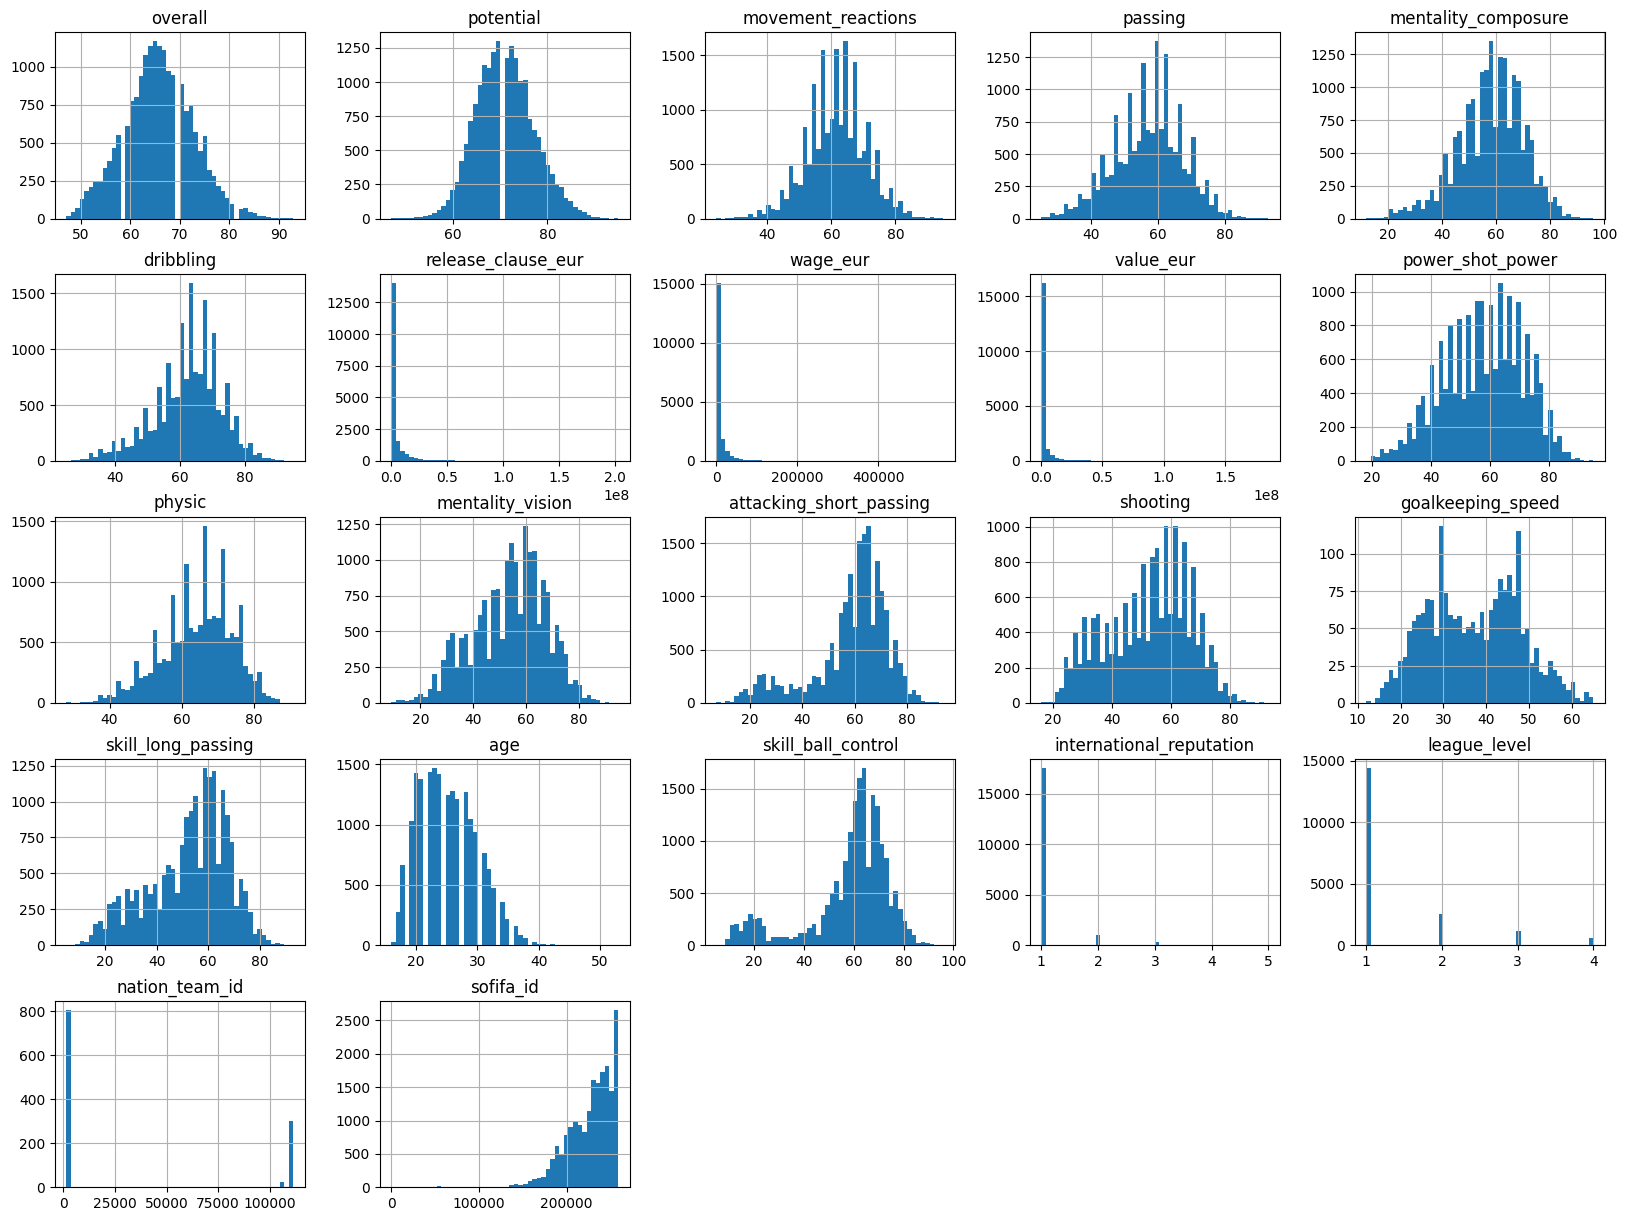

In [162]:
#Plotting histograms to show how the dependent variables are related to the independent variable
%matplotlib inline
import matplotlib.pyplot as plt
players_ratings21.hist(bins=50, figsize=(20,15))
plt.show()

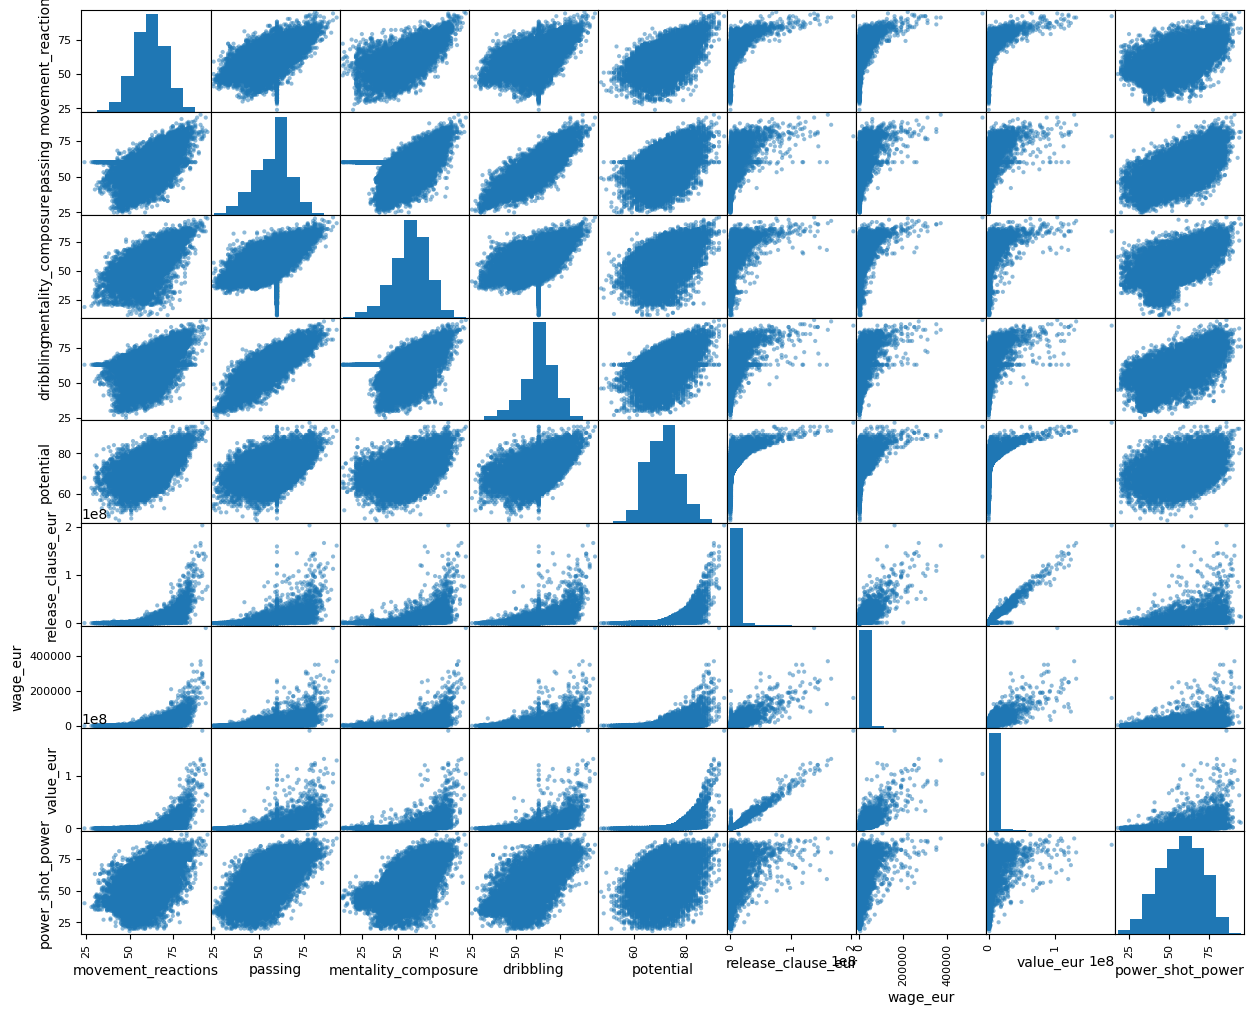

In [163]:
#Plotting scatterplots to show how the dependent variables are related to the independent variable
from pandas.plotting import scatter_matrix
attributes = ['movement_reactions','passing','mentality_composure','dribbling',
'potential','release_clause_eur','wage_eur','value_eur',
'power_shot_power']
scatter_matrix(imputed_df[attributes], figsize=(15,12))
plt.show()

# Dividing the dataset into X, the dependent variable and Y the independent variable

In [164]:
Y = imputed_df['overall']
X = imputed_df.drop('overall', axis=1)

In [165]:
X = pd.get_dummies(imputed_df)
X

,overall,potential,movement_reactions,passing,mentality_composure,dribbling,release_clause_eur,wage_eur,value_eur,power_shot_power,...,attacking_short_passing,shooting,goalkeeping_speed,skill_long_passing,age,skill_ball_control,international_reputation,league_level,nation_team_id,sofifa_id
0,93.0,93.0,94.0,91.0,96.0,95.0,138400000.0,560000.0,103500000.0,86.0,...,91.0,92.0,45.0,91.0,33.0,96.0,5.0,1.0,1369.0,158023.0
1,92.0,92.0,95.0,81.0,95.0,89.0,75900000.0,220000.0,63000000.0,94.0,...,82.0,93.0,45.0,77.0,35.0,92.0,5.0,1.0,1354.0,20801.0
2,91.0,91.0,93.0,78.0,88.0,85.0,132000000.0,240000.0,111000000.0,89.0,...,84.0,91.0,45.0,70.0,31.0,88.0,4.0,1.0,1318.0,188545.0
3,91.0,91.0,91.0,86.0,93.0,94.0,166500000.0,270000.0,132000000.0,80.0,...,87.0,85.0,45.0,81.0,28.0,95.0,5.0,1.0,1318.0,190871.0
4,91.0,91.0,91.0,93.0,91.0,88.0,161000000.0,370000.0,129000000.0,91.0,...,94.0,86.0,45.0,93.0,29.0,92.0,4.0,1.0,1325.0,192985.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,47.0,52.0,48.0,26.0,40.0,27.0,57000.0,1000.0,70000.0,35.0,...,31.0,23.0,45.0,25.0,21.0,24.0,1.0,1.0,1318.0,257710.0
18940,47.0,53.0,50.0,49.0,35.0,47.0,72000.0,1000.0,70000.0,38.0,...,55.0,32.0,45.0,50.0,21.0,45.0,1.0,1.0,1318.0,257933.0
18941,47.0,47.0,44.0,49.0,35.0,46.0,47000.0,2000.0,45000.0,49.0,...,56.0,37.0,45.0,56.0,28.0,43.0,1.0,1.0,1318.0,257936.0
18942,47.0,67.0,53.0,40.0,45.0,53.0,165000.0,500.0,130000.0,50.0,...,45.0,46.0,45.0,37.0,17.0,44.0,1.0,4.0,1318.0,258736.0


In [166]:
#Scaling the X, the dependent variable using the standard scaler
X=StandardScaler().fit_transform(X)
X

array([[ 3.90200649,  3.58656347,  3.55443758, ..., -0.47749392,
        -0.1280427 , -2.51084765],
       [ 3.75919205,  3.42289263,  3.66417438, ..., -0.47749392,
        -0.12910272, -7.56211472],
       [ 3.61637762,  3.25922178,  3.44470079, ..., -0.47749392,
        -0.13164678, -1.38730498],
       ...,
       [-2.66745769, -3.94229527, -1.93240217, ..., -0.47749392,
        -0.13164678,  1.16704107],
       [-2.66745769, -0.66887843, -0.94477101, ...,  3.60079503,
        -0.13164678,  1.1964898 ],
       [-2.66745769, -0.66887843, -1.1642446 , ...,  3.60079503,
        -0.13164678,  1.19737326]])

In [167]:
#Displaying the number of Y to check if there is no error
print(Y.value_counts())

65.0    1168
66.0    1139
64.0    1135
67.0    1112
63.0    1078
68.0     974
69.0     943
62.0     941
70.0     885
61.0     802
60.0     775
72.0     746
71.0     707
59.0     612
73.0     571
58.0     552
75.0     543
57.0     467
74.0     447
56.0     379
55.0     333
76.0     321
77.0     279
54.0     250
53.0     246
78.0     215
52.0     208
79.0     180
51.0     180
80.0     137
50.0     127
81.0      94
83.0      72
49.0      67
82.0      60
48.0      43
84.0      41
85.0      37
87.0      20
47.0      16
86.0      14
88.0      10
89.0       6
90.0       6
91.0       4
92.0       1
93.0       1
Name: overall, dtype: int64


# Splitting the dataset into training and Testing sets

In [168]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

In [169]:
#Using a decision tree classifier
decision_tree=DecisionTreeClassifier(criterion='entropy',random_state=42)

In [170]:
#Applying soft voting
voting_classifier = VotingClassifier(estimators=[
    ('decision_tree', decision_tree),
], voting='soft')

In [171]:
for model in (decision_tree,voting_classifier):
  model.fit(Xtrain,Ytrain)
  y_pred=model.predict(Xtest)
  print(model.__class__.__name__,accuracy_score(y_pred,Ytest))

DecisionTreeClassifier 0.9997360781208762
VotingClassifier 0.9997360781208762


In [172]:
#training with cross-validation using RandomForest Regressor
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(Xtrain, Ytrain)

RandomForestRegressor()

In [173]:
#Checking the mean_squared error of the model
y_predictions = forest_reg.predict(Xtrain)
forest_mse = mean_squared_error(Ytrain, y_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.007233212740248658

In [174]:
#Finding the coefficient of determination of the model
from sklearn.metrics import r2_score

# Make predictions on the training set
y_pred_train = forest_reg.predict(Xtrain)

# Calculate the R-squared score
r2 = r2_score(Ytrain, y_pred_train)
print("RandomForest R-squared score:", r2)

RandomForest R-squared score: 0.9999989430543179


In [175]:
#Using the GridSearch method
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(Xtrain, Ytrain)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [176]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [177]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(Xtest)
final_mse = mean_squared_error(Ytest, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

0.1227274282366988

In [178]:
from sklearn.metrics import r2_score

# Access the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the training set using the best model
y_pred_train = best_model.predict(Xtrain)

# Calculate the R-squared score on the training set
r2_train = r2_score(Ytrain, y_pred_train)
print("R-squared score on training set:", r2_train)

R-squared score on training set: 0.9999174598604665


In [179]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Instantiate the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor()

# Fit the model to the training data
gb_regressor.fit(Xtrain, Ytrain)

# Generate predictions on the test data
y_pred = gb_regressor.predict(Xtest)

# Evaluate the model
mse = mean_squared_error(Ytest, y_pred)
r2 = r2_score(Ytest, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R-squared):", r2)

Mean Squared Error (MSE): 0.0006763003739308568
Coefficient of Determination (R-squared): 0.9999856518352593


In [180]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [181]:
# Load the "players_22" dataset
players_ratings22=pd.read_csv('/content/drive/My Drive/Colab Notebooks/FIFA_Player_Ratings/players_22.csv')

players_ratings22



,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,...,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,...,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,...,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,...,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png


In [182]:
# Preprocess the new data (make sure to apply the same preprocessing as done on the training data)

# Extract the features from the "players_22" dataset
#player stat features
columns = ['overall','potential','movement_reactions','passing','mentality_composure','dribbling',
'release_clause_eur','wage_eur','value_eur',
'power_shot_power','physic','mentality_vision','attacking_short_passing','shooting','goalkeeping_speed',
'skill_long_passing','age','skill_ball_control','international_reputation','league_level', 'nation_team_id','sofifa_id']
players_ratings22= players_ratings22[columns]
players_ratings22.head()



,overall,potential,movement_reactions,passing,mentality_composure,dribbling,release_clause_eur,wage_eur,value_eur,power_shot_power,...,attacking_short_passing,shooting,goalkeeping_speed,skill_long_passing,age,skill_ball_control,international_reputation,league_level,nation_team_id,sofifa_id
0,93,93,94,91.0,96,95.0,144300000.0,320000.0,78000000.0,86,...,91,92.0,NaN,91,34,96,5,1.0,1369.0,158023
1,92,92,93,79.0,88,86.0,197200000.0,270000.0,119500000.0,90,...,85,92.0,NaN,70,32,88,5,1.0,1353.0,188545
2,91,91,94,80.0,95,88.0,83300000.0,270000.0,45000000.0,94,...,80,94.0,NaN,77,36,88,5,1.0,1354.0,20801
3,91,91,89,86.0,93,94.0,238700000.0,270000.0,129000000.0,80,...,86,83.0,NaN,81,29,95,5,1.0,NaN,190871
4,91,91,91,93.0,89,88.0,232200000.0,350000.0,125500000.0,91,...,94,86.0,NaN,93,30,91,4,1.0,1325.0,192985


In [183]:
imputer = SimpleImputer(strategy='most_frequent')

imputed_d = imputer.fit_transform(players_ratings22)

imputed_d = pd.DataFrame(imputed_data, columns=players_ratings22.columns)
imputed_d

,overall,potential,movement_reactions,passing,mentality_composure,dribbling,release_clause_eur,wage_eur,value_eur,power_shot_power,...,attacking_short_passing,shooting,goalkeeping_speed,skill_long_passing,age,skill_ball_control,international_reputation,league_level,nation_team_id,sofifa_id
0,93.0,93.0,94.0,91.0,96.0,95.0,138400000.0,560000.0,103500000.0,86.0,...,91.0,92.0,45.0,91.0,33.0,96.0,5.0,1.0,1369.0,158023.0
1,92.0,92.0,95.0,81.0,95.0,89.0,75900000.0,220000.0,63000000.0,94.0,...,82.0,93.0,45.0,77.0,35.0,92.0,5.0,1.0,1354.0,20801.0
2,91.0,91.0,93.0,78.0,88.0,85.0,132000000.0,240000.0,111000000.0,89.0,...,84.0,91.0,45.0,70.0,31.0,88.0,4.0,1.0,1318.0,188545.0
3,91.0,91.0,91.0,86.0,93.0,94.0,166500000.0,270000.0,132000000.0,80.0,...,87.0,85.0,45.0,81.0,28.0,95.0,5.0,1.0,1318.0,190871.0
4,91.0,91.0,91.0,93.0,91.0,88.0,161000000.0,370000.0,129000000.0,91.0,...,94.0,86.0,45.0,93.0,29.0,92.0,4.0,1.0,1325.0,192985.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,47.0,52.0,48.0,26.0,40.0,27.0,57000.0,1000.0,70000.0,35.0,...,31.0,23.0,45.0,25.0,21.0,24.0,1.0,1.0,1318.0,257710.0
18940,47.0,53.0,50.0,49.0,35.0,47.0,72000.0,1000.0,70000.0,38.0,...,55.0,32.0,45.0,50.0,21.0,45.0,1.0,1.0,1318.0,257933.0
18941,47.0,47.0,44.0,49.0,35.0,46.0,47000.0,2000.0,45000.0,49.0,...,56.0,37.0,45.0,56.0,28.0,43.0,1.0,1.0,1318.0,257936.0
18942,47.0,67.0,53.0,40.0,45.0,53.0,165000.0,500.0,130000.0,50.0,...,45.0,46.0,45.0,37.0,17.0,44.0,1.0,4.0,1318.0,258736.0


In [184]:
X_new = imputed_d.drop('overall', axis=1)
X_new

,potential,movement_reactions,passing,mentality_composure,dribbling,release_clause_eur,wage_eur,value_eur,power_shot_power,physic,...,attacking_short_passing,shooting,goalkeeping_speed,skill_long_passing,age,skill_ball_control,international_reputation,league_level,nation_team_id,sofifa_id
0,93.0,94.0,91.0,96.0,95.0,138400000.0,560000.0,103500000.0,86.0,65.0,...,91.0,92.0,45.0,91.0,33.0,96.0,5.0,1.0,1369.0,158023.0
1,92.0,95.0,81.0,95.0,89.0,75900000.0,220000.0,63000000.0,94.0,77.0,...,82.0,93.0,45.0,77.0,35.0,92.0,5.0,1.0,1354.0,20801.0
2,91.0,93.0,78.0,88.0,85.0,132000000.0,240000.0,111000000.0,89.0,82.0,...,84.0,91.0,45.0,70.0,31.0,88.0,4.0,1.0,1318.0,188545.0
3,91.0,91.0,86.0,93.0,94.0,166500000.0,270000.0,132000000.0,80.0,59.0,...,87.0,85.0,45.0,81.0,28.0,95.0,5.0,1.0,1318.0,190871.0
4,91.0,91.0,93.0,91.0,88.0,161000000.0,370000.0,129000000.0,91.0,78.0,...,94.0,86.0,45.0,93.0,29.0,92.0,4.0,1.0,1325.0,192985.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,52.0,48.0,26.0,40.0,27.0,57000.0,1000.0,70000.0,35.0,48.0,...,31.0,23.0,45.0,25.0,21.0,24.0,1.0,1.0,1318.0,257710.0
18940,53.0,50.0,49.0,35.0,47.0,72000.0,1000.0,70000.0,38.0,48.0,...,55.0,32.0,45.0,50.0,21.0,45.0,1.0,1.0,1318.0,257933.0
18941,47.0,44.0,49.0,35.0,46.0,47000.0,2000.0,45000.0,49.0,59.0,...,56.0,37.0,45.0,56.0,28.0,43.0,1.0,1.0,1318.0,257936.0
18942,67.0,53.0,40.0,45.0,53.0,165000.0,500.0,130000.0,50.0,40.0,...,45.0,46.0,45.0,37.0,17.0,44.0,1.0,4.0,1318.0,258736.0


In [185]:
X_new = pd.get_dummies(imputed_d)
X_new

,overall,potential,movement_reactions,passing,mentality_composure,dribbling,release_clause_eur,wage_eur,value_eur,power_shot_power,...,attacking_short_passing,shooting,goalkeeping_speed,skill_long_passing,age,skill_ball_control,international_reputation,league_level,nation_team_id,sofifa_id
0,93.0,93.0,94.0,91.0,96.0,95.0,138400000.0,560000.0,103500000.0,86.0,...,91.0,92.0,45.0,91.0,33.0,96.0,5.0,1.0,1369.0,158023.0
1,92.0,92.0,95.0,81.0,95.0,89.0,75900000.0,220000.0,63000000.0,94.0,...,82.0,93.0,45.0,77.0,35.0,92.0,5.0,1.0,1354.0,20801.0
2,91.0,91.0,93.0,78.0,88.0,85.0,132000000.0,240000.0,111000000.0,89.0,...,84.0,91.0,45.0,70.0,31.0,88.0,4.0,1.0,1318.0,188545.0
3,91.0,91.0,91.0,86.0,93.0,94.0,166500000.0,270000.0,132000000.0,80.0,...,87.0,85.0,45.0,81.0,28.0,95.0,5.0,1.0,1318.0,190871.0
4,91.0,91.0,91.0,93.0,91.0,88.0,161000000.0,370000.0,129000000.0,91.0,...,94.0,86.0,45.0,93.0,29.0,92.0,4.0,1.0,1325.0,192985.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,47.0,52.0,48.0,26.0,40.0,27.0,57000.0,1000.0,70000.0,35.0,...,31.0,23.0,45.0,25.0,21.0,24.0,1.0,1.0,1318.0,257710.0
18940,47.0,53.0,50.0,49.0,35.0,47.0,72000.0,1000.0,70000.0,38.0,...,55.0,32.0,45.0,50.0,21.0,45.0,1.0,1.0,1318.0,257933.0
18941,47.0,47.0,44.0,49.0,35.0,46.0,47000.0,2000.0,45000.0,49.0,...,56.0,37.0,45.0,56.0,28.0,43.0,1.0,1.0,1318.0,257936.0
18942,47.0,67.0,53.0,40.0,45.0,53.0,165000.0,500.0,130000.0,50.0,...,45.0,46.0,45.0,37.0,17.0,44.0,1.0,4.0,1318.0,258736.0


In [186]:
X_new=StandardScaler().fit_transform(X_new)
X_new

array([[ 3.90200649,  3.58656347,  3.55443758, ..., -0.47749392,
        -0.1280427 , -2.51084765],
       [ 3.75919205,  3.42289263,  3.66417438, ..., -0.47749392,
        -0.12910272, -7.56211472],
       [ 3.61637762,  3.25922178,  3.44470079, ..., -0.47749392,
        -0.13164678, -1.38730498],
       ...,
       [-2.66745769, -3.94229527, -1.93240217, ..., -0.47749392,
        -0.13164678,  1.16704107],
       [-2.66745769, -0.66887843, -0.94477101, ...,  3.60079503,
        -0.13164678,  1.1964898 ],
       [-2.66745769, -0.66887843, -1.1642446 , ...,  3.60079503,
        -0.13164678,  1.19737326]])

In [187]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create a new instance of RandomForestRegressor
forest_reg = RandomForestRegressor()

# Fit the model with the training data
forest_reg.fit(Xtrain, Ytrain)

# Generate predictions on the new data
players_22_predictions = forest_reg.predict(X_new)

# Compare the predicted values with the actual target values
mse = mean_squared_error(Y, players_22_predictions)
r2 = r2_score(Y, players_22_predictions)

print("Mean Squared Error (MSE) on new data:", mse)
print("Coefficient of Determination (R-squared) on new data:", r2)

Mean Squared Error (MSE) on new data: 0.00023369404560810792
Coefficient of Determination (R-squared) on new data: 0.9999952335846738


In [188]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Instantiate the Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor()

# Fit the model to the training data
gb_regressor.fit(Xtrain, Ytrain)

# Generate predictions on the new data
players_22_predictions = forest_reg.predict(X_new)

# Compare the predicted values with the actual target values
mse = mean_squared_error(Y, players_22_predictions)
r2 = r2_score(Y, players_22_predictions)

print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R-squared):", r2)

Mean Squared Error (MSE): 0.00023369404560810792
Coefficient of Determination (R-squared): 0.9999952335846738


In [189]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import make_scorer

# Define the models
gb_regressor = GradientBoostingRegressor()
forest_reg = RandomForestRegressor()

# Perform cross-validation and get mean squared error scores
mse_scores_gb = -cross_val_score(gb_regressor, Xtrain, Ytrain, cv=5, scoring="neg_mean_squared_error")
mse_scores_forest = -cross_val_score(forest_reg, Xtrain, Ytrain, cv=5, scoring="neg_mean_squared_error")

# Calculate the mean of the MSE scores
avg_mse_gb = mse_scores_gb.mean()
avg_mse_forest = mse_scores_forest.mean()

# Choose the model with the lowest average MSE
best_model = gb_regressor if avg_mse_gb < avg_mse_forest else forest_reg

# Fit the best model on the full training data
best_model.fit(Xtrain, Ytrain)

# Generate predictions on the test data
y_pred = best_model.predict(Xtest)

# Evaluate the best model
mse = mean_squared_error(Ytest, y_pred)
r2 = r2_score(Ytest, y_pred)

print("Best Model:", best_model)
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R-squared):", r2)

Best Model: GradientBoostingRegressor()
Mean Squared Error (MSE): 0.0007158737595012633
Coefficient of Determination (R-squared): 0.9999848122594179


In [192]:
import pickle

# Train the model
model = RandomForestRegressor()
model.fit(Xtrain, Ytrain)
# Save the trained model to a file
with open('/content/drive/My Drive/Colab Notebooks/FIFA_Player_Ratings/RFRtrained_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
import pickle

# Train the model
model = GradientBoostingRegressor()
model.fit(Xtrain, Ytrain)

# Save the trained model to a file
with open('/content/drive/My Drive/Colab Notebooks/FIFA_Player_Ratings/GBRtrained_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
import pickle

columns = ['overall','potential','movement_reactions','passing','mentality_composure','dribbling',
'release_clause_eur','wage_eur','value_eur',
'power_shot_power','physic','mentality_vision','attacking_short_passing','shooting','goalkeeping_speed',
'skill_long_passing','age','skill_ball_control','international_reputation','league_level', 'nation_team_id','sofifa_id']
players_ratings22= players_ratings22[columns]
players_ratings22.head()

with open('/content/drive/My Drive/Colab Notebooks/FIFA_Player_Ratings/selected_features.pkl', 'rb') as f:
    pickle.dump(columns, f)